In [3]:
# install simpletransformers module if needed
# %pip install simpletransformers

In [2]:
import wandb
import os
import numpy as np
import pandas as pd
import sklearn


from sklearn.model_selection import train_test_split, KFold
from simpletransformers.classification import ClassificationModel
from google.colab import files

In [3]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
# load files into colab

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving article-data.csv to article-data.csv
User uploaded file "article-data.csv" with length 2423482 bytes


In [7]:
df = pd.read_csv('article-data.csv', index_col=0)

BERT_MODEL = "TurkuNLP/bert-base-finnish-cased-v1"
N_EPOCHS = 4

BERT_ARGS_KF = {
    "output_dir":'./results',
    "reprocess_input_data": True,
    "fp16":False,
    "num_train_epochs": N_EPOCHS,
    "overwrite_output_dir":True,
    "evaluate_during_training": False
}

N_LABELS = len(set(df.pred_class.values))
TRAIN_AND_VAL_SIZE = 0.90
TEST_SIZE = 1.0 - TRAIN_AND_VAL_SIZE

In [8]:
df_train_and_val, df_test = train_test_split(df, test_size=TEST_SIZE)

print(f"train and validation sample shape: {df_train_and_val.shape}")
print(f"test sample shape: {df_test.shape}")

train and validation sample shape: (349, 2)
test sample shape: (39, 2)


In [12]:
#  save df_train_and_val, and df_test to seperate csv-files, in order to avoid mixing final training and testing data in the future
df_train_and_val.to_csv('article-data-train-and-val.csv')
df_test.to_csv('article-data-test.csv')

Lets use KFOLD-method to analyze if model evaluation gives similar results with given sample size for each fold.

In [9]:
KFOLD_N_SPLITS = 5

kf = KFold(n_splits=KFOLD_N_SPLITS, random_state=42, shuffle=True)

results_kf = []
for train_index, val_index in kf.split(df_train_and_val):
    df_train = df_train_and_val.iloc[train_index]
    df_val = df_train_and_val.iloc[val_index]

    model = ClassificationModel(
        "bert",
        BERT_MODEL,
        num_labels=N_LABELS,
        args=BERT_ARGS_KF,
    )
    model.train_model(df_train)

    result, _, _ = model.eval_model(df_val, acc=sklearn.metrics.accuracy_score)
    results_kf.append(result['acc'])

for i, result in enumerate(results_kf, 1):
    print(f"Fold-{i}: {result}")

print(f"{KFOLD_N_SPLITS}-fold CV accuracy result: Mean: {np.mean(results_kf)} Standard deviation:{np.std(results_kf)}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/279 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/279 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/279 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/279 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/280 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/35 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/69 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Fold-1: 0.8285714285714286
Fold-2: 0.8428571428571429
Fold-3: 0.7428571428571429
Fold-4: 0.8
Fold-5: 0.8405797101449275
5-fold CV accuracy result: Mean: 0.8109730848861284 Standard deviation:0.037317656043203494


All good. Lets fine-tune batch size and learning rate in order to gain better performance.

In [ ]:
VAL_SIZE = 0.15
df_train, df_val = train_test_split(df_train_and_val, test_size=VAL_SIZE)

print(f"train sample shape: {df_train.shape}")
print(f"validation sample shape: {df_val.shape}")

In [11]:
for batch_size in [8, 16, 32, 64]:
    for learning_rate in [2e-5, 4e-5, 6e-5]:
        BERT_ARGS = {
          "output_dir":'./results',
          "reprocess_input_data": True,
          "fp16":False,
          "num_train_epochs": N_EPOCHS,
          "overwrite_output_dir":True,
          "report_to":"wandb",
          "wandb_project": "bert-batchsize-analysis",
          "evaluate_during_training": True,
          "train_batch_size": batch_size,
          "eval_batch_size": batch_size,
          "learning_rate": learning_rate
        }

        model = ClassificationModel(
          "bert",
          BERT_MODEL,
          num_labels=N_LABELS,
          args=BERT_ARGS,
        )

        model.train_model(df_train, eval_df=df_val)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

wandb: Currently logged in as: jussni. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,█▁
eval_loss,█▄▂▁
global_step,▁▂▃▅▆█
lr,█▁
mcc,▁▄▅█
train_loss,█▄▅▁
Training loss,0.49676
eval_loss,0.57205
global_step,148
lr,1e-05
mcc,0.67426


Running Epoch 0 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,█▁
eval_loss,█▃▂▁
global_step,▁▂▃▅▆█
lr,█▁
mcc,▁▆▆█
train_loss,█▅▁▁
Training loss,0.12013
eval_loss,0.39592
global_step,148
lr,1e-05
mcc,0.79445


Running Epoch 0 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,█▁
eval_loss,█▅▁▄
global_step,▁▂▃▅▆█
lr,█▁
mcc,▁▃▇█
train_loss,█▆▁▁
Training loss,0.0193
eval_loss,0.58477
global_step,148
lr,2e-05
mcc,0.79825


Running Epoch 0 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,▁
eval_loss,█▄▂▁
global_step,▁▃▅▆█
lr,▁
mcc,▁█▇▇
train_loss,█▅▁▂
Training loss,0.75455
eval_loss,0.68122
global_step,76
lr,1e-05
mcc,0.61897


Running Epoch 0 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,▁
eval_loss,█▃▂▁
global_step,▁▃▅▆█
lr,▁
mcc,▁▂▁█
train_loss,█▄▂▁
Training loss,0.31051
eval_loss,0.38033
global_step,76
lr,1e-05
mcc,0.79544


Running Epoch 0 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Training loss,▁
eval_loss,█▄▁▃
global_step,▁▃▅▆█
lr,▁
mcc,▁▃█▅
train_loss,█▃▁▁
Training loss,0.36867
eval_loss,0.43724
global_step,76
lr,2e-05
mcc,0.71464


Running Epoch 0 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

eval_loss,█▄▂▁
global_step,▁▃▆█
mcc,▁▃██
train_loss,█▅▂▁
eval_loss,0.90898
global_step,40
mcc,0.62373
train_loss,0.68091


Running Epoch 0 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

eval_loss,█▅▂▁
global_step,▁▃▆█
mcc,▁▆██
train_loss,█▄▁▂
eval_loss,0.71266
global_step,40
mcc,0.61743
train_loss,0.45625


Running Epoch 0 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

eval_loss,█▃▂▁
global_step,▁▃▆█
mcc,▁▆▆█
train_loss,█▃▁▂
eval_loss,0.52979
global_step,40
mcc,0.76983
train_loss,0.30441


Running Epoch 0 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

eval_loss,█▅▂▁
global_step,▁▃▆█
mcc,▁▆▅█
train_loss,█▄▃▁
eval_loss,1.11952
global_step,20
mcc,0.5339
train_loss,0.99795


Running Epoch 0 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/296 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

eval_loss,█▄▂▁
global_step,▁▃▆█
mcc,▁▆▆█
train_loss,█▄▂▁
eval_loss,0.87271
global_step,20
mcc,0.64452
train_loss,0.80739


Running Epoch 0 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

In [13]:
wandb.finish()

eval_loss,█▃▁▁
global_step,▁▃▆█
mcc,▁▄█▆
train_loss,█▆▃▁
eval_loss,0.75348
global_step,20
mcc,0.59933
train_loss,0.61818


WanDB gives following evaluation losses for each learning rate and batch size combination:
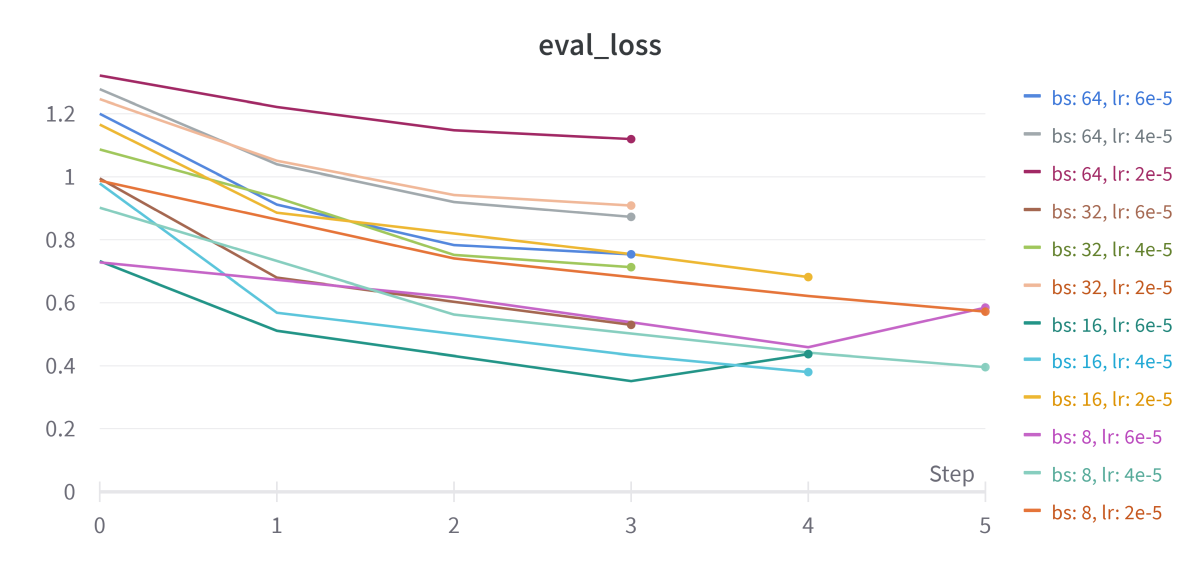

Seems like the BERT-model default learning rate (4e-5) and batch size of 8 are valid options.